In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
np.set_printoptions(suppress=True)
import utils
import matplotlib.pyplot as plt
#Evaluation functions in evaluation.py
from evaluation import get_best_r_squared_permute, get_r_squared
import h5py


Instructions for updating:
non-resource variables are not supported in the long term


In [87]:
# ground_truth_data_dict = utils.read_data('/home/cole/hierarchical_lfads/synth_data/lorenz_new.h5')
data_parent_dir = 'exp_data'
data_stem = 'data_0.h5'
# data_parent_dir = 'data'
# data_stem = 'data'

data_dir = 'Chewie_CO_FF_2016-10-07_pos_M1_spikes'
results_parent_dir = 'exp_results_{}/{}/tndm_double/'.format(data_dir, data_stem)
lfads_results_parent_dir = 'exp_results_{}/{}/lfads/'.format(data_dir, data_stem)
# results_parent_dir = 'results_{}/plfads/'.format(data_dir, data_stem)
# results_folder = 'epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-l2gs=2000.0-l2rgs=4000.0-kp=.85-seed=0-date=05-23-2021-06:32:40'
lfads_results_folder = 'fdim=3-cdim=0-gdim=64-icdim=64-icencdim=64-bs=16-bse=128-lrinit=.01-lrstop=1e-05-lrdecay=.95-lrncomp=6-keepp=.95-l2gscale=2000.0-klicw=1.0-klis=2000-klss=0-seed=0-date=05-13-2021-07:59:42'

results_folder = 'iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=4-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=15-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=1-date=05-24-2021-05:36:23'
# results_folder = 'iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=15-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=1-date=05-24-2021-05:36:13'
# results_folder = 'iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=4-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=15-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=0-date=05-24-2021-04:16:17'
# results_folder = 'iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=15-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=0-date=05-24-2021-04:03:29'
# results_folder = 'iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=4-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-l2gs=2000.0-l2rgs=4000.0-kp=.85-seed=0-date=05-24-2021-03:11:50'
# results_folder = 'iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-l2gs=2000.0-l2rgs=4000.0-kp=.85-seed=0-date=05-24-2021-03:09:08'
# results_folder = 'epsilon=1e-8-bod=gaussian-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=0-date=05-23-2021-06:38:10'
# results_folder = 'epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-seed=0-date=05-23-2021-01:57:58'
# results_folder = 'epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-seed=0-date=05-23-2021-02:04:55'
# results_folder = 'epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=0-date=05-23-2021-04:05:42'
# results_folder = 'epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=3-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=10-l2gs=2000.0-l2rgs=2000.0-kp=.75-seed=0-date=05-23-2021-04:21:09'

ground_truth_data_dict = utils.read_data(data_parent_dir + '/' + data_dir + '/{}'.format(data_stem))

ground_truth_train_spikes = ground_truth_data_dict['train_rates']
ground_truth_test_spikes = ground_truth_data_dict['test_data']
ground_truth_train_spikes = ground_truth_data_dict['train_data']
ground_truth_train_behaviours = ground_truth_data_dict['train_behaviours']
ground_truth_test_behaviours = ground_truth_data_dict['test_behaviours']
ground_truth_valid_spikes = ground_truth_data_dict['valid_data']
ground_truth_valid_behaviours = ground_truth_data_dict['valid_behaviours']

behaviour_dim = ground_truth_train_behaviours.shape[1]

In [88]:
posterior_test_data = utils.read_data(results_parent_dir + '{}/model_runs__test_posterior_sample_and_average'.format(results_folder))
posterior_valid_data = utils.read_data(results_parent_dir + '{}/model_runs__valid_posterior_sample_and_average'.format(results_folder))
posterior_train_data = utils.read_data(results_parent_dir + '{}/model_runs__train_posterior_sample_and_average'.format(results_folder))

lfads_posterior_test_data = utils.read_data(lfads_results_parent_dir + '{}/model_runs__test_posterior_sample_and_average'.format(lfads_results_folder))
lfads_posterior_valid_data = utils.read_data(lfads_results_parent_dir + '{}/model_runs__valid_posterior_sample_and_average'.format(lfads_results_folder))
lfads_posterior_train_data = utils.read_data(lfads_results_parent_dir + '{}/model_runs__train_posterior_sample_and_average'.format(lfads_results_folder))
                      
posterior_valid_latent = posterior_valid_data['factors']
posterior_valid_rates = posterior_valid_data['output_dist_params']
posterior_valid_ics = posterior_valid_data['gen_ics']
posterior_valid_rel_ics = posterior_valid_data['rel_gen_ics']
posterior_valid_gen_states = posterior_valid_data['gen_states']
posterior_valid_rel_gen_states = posterior_valid_data['rel_gen_states']
posterior_valid_behaviours = posterior_valid_data['behaviour_output_dist_params']


posterior_train_latent = posterior_train_data['factors']
posterior_train_rates = posterior_train_data['output_dist_params']
posterior_train_ics = posterior_train_data['gen_ics']
posterior_train_rel_ics = posterior_train_data['rel_gen_ics']
posterior_train_gen_states = posterior_train_data['gen_states']
posterior_train_rel_gen_states = posterior_train_data['rel_gen_states']
posterior_train_behaviours = posterior_train_data['behaviour_output_dist_params']


posterior_test_latent = posterior_test_data['factors']
posterior_test_rates = posterior_test_data['output_dist_params']
posterior_test_ics = posterior_test_data['gen_ics']
posterior_test_rel_ics = posterior_test_data['rel_gen_ics']
posterior_test_gen_states = posterior_test_data['gen_states']
posterior_test_rel_gen_states = posterior_test_data['rel_gen_states']
posterior_test_behaviours = posterior_test_data['behaviour_output_dist_params']

lfads_posterior_valid_latent = lfads_posterior_valid_data['factors']
lfads_posterior_valid_rates = lfads_posterior_valid_data['output_dist_params']
lfads_posterior_valid_ics = lfads_posterior_valid_data['gen_ics']
lfads_posterior_valid_gen_states = lfads_posterior_valid_data['gen_states']


lfads_posterior_train_latent = lfads_posterior_train_data['factors']
lfads_posterior_train_rates = lfads_posterior_train_data['output_dist_params']
lfads_posterior_train_ics = lfads_posterior_train_data['gen_ics']
lfads_posterior_train_gen_states = lfads_posterior_train_data['gen_states']


lfads_posterior_test_latent = lfads_posterior_test_data['factors']
lfads_posterior_test_rates = lfads_posterior_test_data['output_dist_params']
lfads_posterior_test_ics = lfads_posterior_test_data['gen_ics']
lfads_posterior_test_gen_states = lfads_posterior_test_data['gen_states']

In [74]:
all_directions_dict = ground_truth_data_dict['train_target_direction']

d = ground_truth_data_dict['test_target_direction']
direction_index_test = [sorted(set(all_directions_dict)).index(i) for i in d]

d = ground_truth_data_dict['train_target_direction']
direction_index_train = [sorted(set(all_directions_dict)).index(i) for i in d]

d = ground_truth_data_dict['valid_target_direction']
direction_index_valid = [sorted(set(all_directions_dict)).index(i) for i in d]

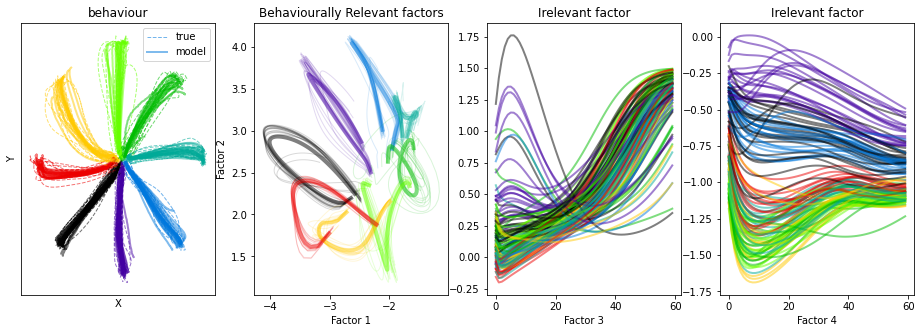

In [32]:
colors = plt.cm.nipy_spectral(np.arange(8)/8)
latents = posterior_train_latent
dir_index = direction_index_train
ground_truth_behaviours = ground_truth_train_behaviours
predicted_behaviours = posterior_train_behaviours
ics = posterior_train_ics
rel_ics = posterior_train_rel_ics

#set here
# latents = posterior_valid_latent
# dir_index = direction_index_valid
# ground_truth_behaviours = ground_truth_valid_behaviours
# predicted_behaviours = posterior_valid_behaviours
# latents = posterior_test_latent
# dir_index = direction_index_test
# ground_truth_behaviours = ground_truth_test_behaviours
# predicted_behaviours = posterior_test_behaviours
# latents = np.concatenate((posterior_test_latent, posterior_valid_latent))
# dir_index = np.concatenate((direction_index_test, direction_index_valid))
# ground_truth_behaviours = np.concatenate((ground_truth_test_behaviours, ground_truth_valid_behaviours), axis=0)
# predicted_behaviours = np.concatenate((posterior_test_behaviours, posterior_valid_behaviours))

n_show = latents.shape[0]
t_show = 60 #latents.shape[1]

plt.figure(figsize=(16,5))

dirs_show = set([0,1,2,3,4,5,6,7])

plt.subplot(1,4,1)
for t in range(n_show):
    if dir_index[t] in dirs_show:
        plt.plot(ground_truth_behaviours[t,:,0],ground_truth_behaviours[t,:,1],color=colors[dir_index[t]],alpha=.55, lw=1, ls='--')
        plt.plot(predicted_behaviours[t,:,0],predicted_behaviours[t,:,1],color=colors[dir_index[t]],alpha=.5,lw=2)
for i in range(8):
    if i in dirs_show:
        plt.plot(np.mean(ground_truth_behaviours[np.array(dir_index)==i,:,0], axis=0), 
                 np.mean(ground_truth_behaviours[np.array(dir_index)==i,:,1], axis=0), color=colors[i],alpha=.5, lw=4)
plt.title('behaviour')
plt.legend(('true','model'))
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(())
plt.yticks(())

plt.subplot(1,4,2)
n_show = latents.shape[0]
for t in range(n_show): 
    if dir_index[t] in dirs_show:
        plt.plot(latents[t,:t_show,0], latents[t,:t_show,1], color=colors[dir_index[t]],alpha=.15, lw=1)
for i in range(8):
    if i in dirs_show:
        plt.plot(np.mean(latents[np.array(dir_index)==i,:t_show,0], axis=0), np.mean(latents[np.array(dir_index)==i,:t_show,1], axis=0), color=colors[i],alpha=.5, lw=4)
plt.title('Behaviourally Relevant factors')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
# plt.xlim(-1,-4)

plt.subplot(1,4,3)
n_show = latents.shape[0]
for t in range(n_show): 
    if dir_index[t] in dirs_show:
        plt.plot(latents[t,:t_show,2],color=colors[dir_index[t]],alpha=.5, lw=2)
plt.title('Irelevant factor')
plt.xlabel('Factor 3')
# plt.xlim(-1,-4)

if latents.shape[2] == 4:
    plt.subplot(1,4,4)
    n_show = latents.shape[0]
    for t in range(n_show):
        plt.plot(latents[t,:t_show,3],color=colors[dir_index[t]],alpha=.5, lw=2)
    plt.title('Irelevant factor')
    plt.xlabel('Factor 4')

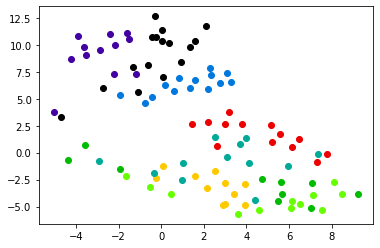

In [27]:
from sklearn.manifold import TSNE
ics_embedded = TSNE(n_components=2, n_jobs=2).fit_transform(ics)
n_show = 100
plt.figure()
for t in range(n_show):
    plt.scatter(ics_embedded[t,0], ics_embedded[t,1], color=colors[dir_index[t]],alpha=1)

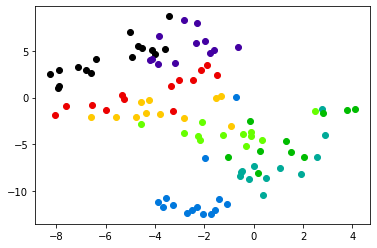

In [21]:
from sklearn.manifold import TSNE
ics_embedded = TSNE(n_components=2, n_jobs=2).fit_transform(ics)
n_show = 100
plt.figure()
for t in range(n_show):
    plt.scatter(ics_embedded[t,0], ics_embedded[t,1], color=colors[dir_index[t]],alpha=1)

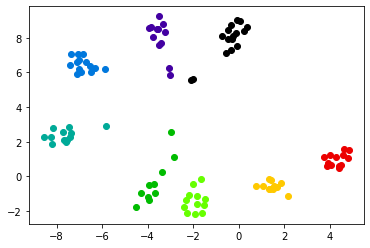

In [28]:
from sklearn.manifold import TSNE
ics_embedded = TSNE(n_components=2, n_jobs=2).fit_transform(rel_ics)
n_show = 100
plt.figure()
for t in range(n_show):
    plt.scatter(ics_embedded[t,0], ics_embedded[t,1], color=colors[dir_index[t]],alpha=1)

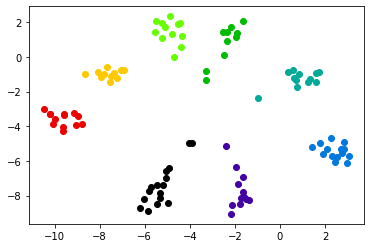

In [22]:
from sklearn.manifold import TSNE
ics_embedded = TSNE(n_components=2, n_jobs=2).fit_transform(rel_ics)
n_show = 100
plt.figure()
for t in range(n_show):
    plt.scatter(ics_embedded[t,0], ics_embedded[t,1], color=colors[dir_index[t]],alpha=1)

In [33]:
# fig = plt.figure(figsize=(10,5))
# ax1 = fig.add_subplot(1, 2, 1)
# ax2 = fig.add_subplot(1, 2, 2, sharex=ax1, sharey=ax1)
# for t in range(n_show):
#     ax1.plot(np.gradient(latents[t,:,0]),color=colors[dir_index[t]],alpha=.15, ls='--')
# for t in range(n_show):
#     ax2.plot(np.gradient(latents[t,:,1]),color=colors[dir_index[t]],alpha=.15, ls='--')

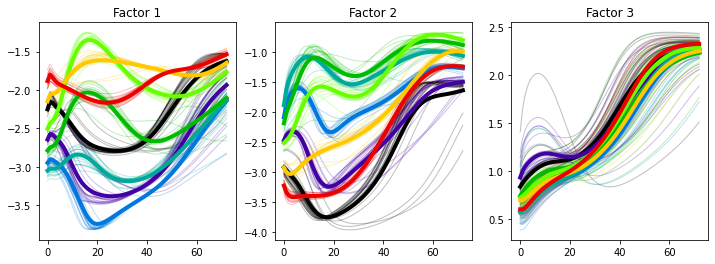

In [61]:
directions_set = range(8)
n_factors = posterior_train_latent.shape[2]
n_show = posterior_train_latent.shape[0]
plt.figure(figsize=(4*n_factors,4))
colors = plt.cm.nipy_spectral(np.arange(8)/8)
for f in range(n_factors):
    plt.subplot(1,n_factors,f+1)  
    for t in range(n_show):
        if direction_index_train[t] in directions_set:
            plt.plot(posterior_train_latent[t,:,f],color=colors[direction_index_train[t]],alpha=.25, lw=1)
    for i in range(8):
        plt.plot(np.mean(posterior_train_latent[np.array(direction_index_train)==i,:,f], axis=0), color=colors[i],alpha=1, lw=4)
    plt.title('Factor {}'.format(f+1))

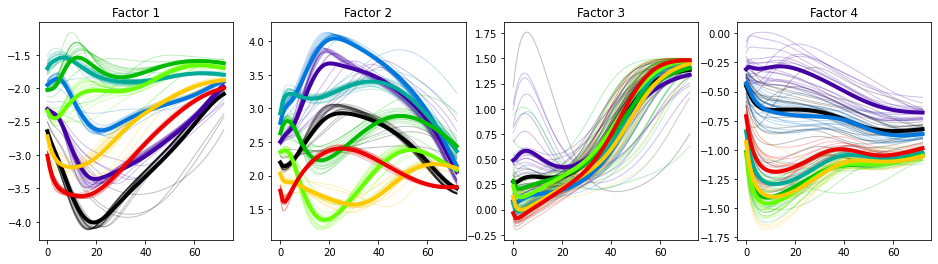

In [35]:
directions_set = range(8)
n_factors = posterior_train_latent.shape[2]
n_show = posterior_train_latent.shape[0]
plt.figure(figsize=(4*n_factors,4))
colors = plt.cm.nipy_spectral(np.arange(8)/8)
for f in range(n_factors):
    plt.subplot(1,n_factors,f+1)  
    for t in range(n_show):
        if direction_index_train[t] in directions_set:
            plt.plot(posterior_train_latent[t,:,f],color=colors[direction_index_train[t]],alpha=.25, lw=1)
    for i in range(8):
        plt.plot(np.mean(posterior_train_latent[np.array(direction_index_train)==i,:,f], axis=0), color=colors[i],alpha=1, lw=4)
    plt.title('Factor {}'.format(f+1))

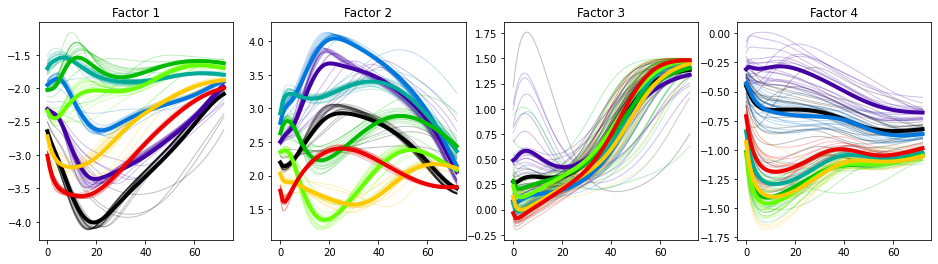

In [75]:
directions_set = range(8)
n_factors = posterior_train_latent.shape[2]
n_show = posterior_train_latent.shape[0]
plt.figure(figsize=(4*n_factors,4))
colors = plt.cm.nipy_spectral(np.arange(8)/8)
for f in range(n_factors):
    plt.subplot(1,n_factors,f+1)  
    for t in range(n_show):
        if direction_index_train[t] in directions_set:
            plt.plot(posterior_train_latent[t,:,f],color=colors[direction_index_train[t]],alpha=.25, lw=1)
    for i in range(8):
        plt.plot(np.mean(posterior_train_latent[np.array(direction_index_train)==i,:,f], axis=0), color=colors[i],alpha=1, lw=4)
    plt.title('Factor {}'.format(f+1))

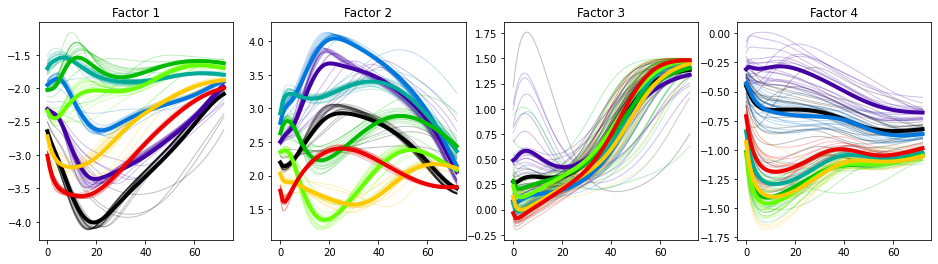

In [83]:
directions_set = range(8)
n_factors = posterior_train_latent.shape[2]
n_show = posterior_train_latent.shape[0]
plt.figure(figsize=(4*n_factors,4))
colors = plt.cm.nipy_spectral(np.arange(8)/8)
for f in range(n_factors):
    plt.subplot(1,n_factors,f+1)  
    for t in range(n_show):
        if direction_index_train[t] in directions_set:
            plt.plot(posterior_train_latent[t,:,f],color=colors[direction_index_train[t]],alpha=.25, lw=1)
    for i in range(8):
        plt.plot(np.mean(posterior_train_latent[np.array(direction_index_train)==i,:,f], axis=0), color=colors[i],alpha=1, lw=4)
    plt.title('Factor {}'.format(f+1))

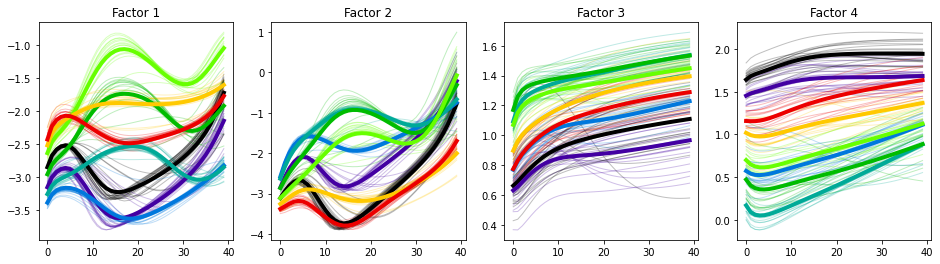

In [71]:
directions_set = range(8)
n_factors = posterior_train_latent.shape[2]
n_show = posterior_train_latent.shape[0]
plt.figure(figsize=(4*n_factors,4))
colors = plt.cm.nipy_spectral(np.arange(8)/8)
for f in range(n_factors):
    plt.subplot(1,n_factors,f+1)  
    for t in range(n_show):
        if direction_index_train[t] in directions_set:
            plt.plot(posterior_train_latent[t,:,f],color=colors[direction_index_train[t]],alpha=.25, lw=1)
    for i in range(8):
        plt.plot(np.mean(posterior_train_latent[np.array(direction_index_train)==i,:,f], axis=0), color=colors[i],alpha=1, lw=4)
    plt.title('Factor {}'.format(f+1))

In [132]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
factors_reconstruct = [0, 1]
relevant_factors_train = posterior_train_latent[:,:,factors_reconstruct]#posterior_train_latent[:,:,:2]
X = np.transpose(relevant_factors_train, (0,2,1)).reshape((relevant_factors_train.shape[0], -1))
y = np.transpose(ground_truth_train_behaviours, (0,2,1)).reshape((ground_truth_train_behaviours.shape[0], -1))
reg = Ridge().fit(X, y)
reg.score(X, y)
# reg.coef_
# reg.intercept_
# reg.predict(np.array([[3, 5]]))

0.9682959842334523

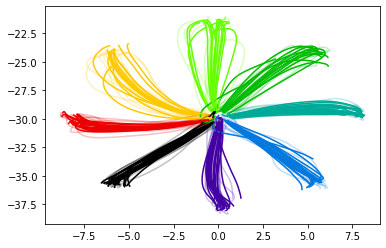

In [133]:
# plt.plot(reg.predict(np.expand_dims(X[0], 0))[0][:73])
# plt.plot(reg.predict(np.expand_dims(X[0], 0))[0][73:])
predicted_behaviours = reg.predict(X)
for t in range(n_show):
    predicted_behaviour = predicted_behaviours[t]
    actual_behaviour = y[t]
    plt.plot(actual_behaviour[:behaviour_dim],actual_behaviour[behaviour_dim:],color=colors[direction_index_train[t]],alpha=.25)
    plt.plot(predicted_behaviour[:behaviour_dim],predicted_behaviour[behaviour_dim:],color=colors[direction_index_train[t]], alpha=1)

0.9223168833814921
0.6110032645398864


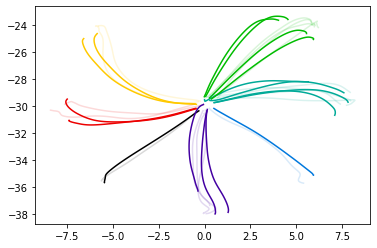

In [134]:
n_show = 17
relevant_factors_test = posterior_test_latent[:,:,factors_reconstruct]#posterior_test_latent[:,:,:2]
X_test = np.transpose(relevant_factors_test, (0,2,1)).reshape((relevant_factors_test.shape[0], -1))
y_test = np.transpose(ground_truth_test_behaviours, (0,2,1)).reshape((ground_truth_test_behaviours.shape[0], -1))
predicted_behaviours = reg.predict(X_test)
for t in range(n_show):
    predicted_behaviour = predicted_behaviours[t]
    actual_behaviour = y_test[t]
    plt.plot(actual_behaviour[:behaviour_dim],actual_behaviour[behaviour_dim:],color=colors[direction_index_test[t]],alpha=.15)
    plt.plot(predicted_behaviour[:behaviour_dim],predicted_behaviour[behaviour_dim:],color=colors[direction_index_test[t]], alpha=1)
print(reg.score(X_test, y_test))
from sklearn.metrics import mean_squared_error
print(mean_squared_error(predicted_behaviours, y_test))

In [43]:
import glob
tf.reset_default_graph()
files = glob.glob(results_parent_dir + '/' + results_folder + '/*_vae.ckpt*meta')
last_ckpt = sorted([f[f.find('ckpt-')+5:f.find('.meta')] for f in files])[-1]
latest_checkpoint = 'tndm_vae.ckpt-'+last_ckpt
print("Latest checkpoint:"+latest_checkpoint)
saver = tf.train.import_meta_graph(results_parent_dir + '/' + results_folder +'/{}.meta'.format(latest_checkpoint))
sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True, log_device_placement=True))
saver.restore(sess, results_parent_dir + '/' + results_folder+'/{}'.format(latest_checkpoint))
fac_2_logrates_W = [v for v in tf.trainable_variables() if v.name == "TNDM/glm/fac_2_logrates_/W:0"][0]
fac_2_logrates_B = [v for v in tf.trainable_variables() if v.name == "TNDM/glm/fac_2_logrates_/b:0"][0]
rel_fac_2_means_W = [v for v in tf.trainable_variables() if v.name == "TNDM/behaviour_dec/rel_fac_2_means_/W:0"][0]
rel_fac_2_means_B = [v for v in tf.trainable_variables() if v.name == "TNDM/behaviour_dec/rel_fac_2_means_/b:0"][0]
print(rel_fac_2_means_W)
# flat = tf.reshape(fac_2_logrates_W, shape=(-1, 3*70))

#factors = list([10,2]0...[10,2]T)
#factors = 73x10x2
#factors = 10x2x73
#factors = 10x146
rel_factors_tensor = tf.reshape(tf.range(200), (5,20,2))
rel_factors_tensor2 = tf.reshape(tf.range(200,400), (5,20,2))
flat_rel_factors_tensor = tf.reshape(rel_factors_tensor, shape=(-1, 2*20)) #5x20x2
flat_rel_factors_tensor_tran = tf.transpose(rel_factors_tensor, perm=[0,2,1])
flat_rel_factors_tensor2 = tf.reshape(flat_rel_factors_tensor_tran, shape=(-1, 2*20)) #5x2x20

loglikelihood_t = tf.square(rel_factors_tensor - rel_factors_tensor2)

f2lr_W, f2lr_B, rf2m_w, rf2m_B, rel_fac_ten, rel_fac_ten2, flat_rel_fac_ten, flat_rel_fac_ten2, llt = sess.run([fac_2_logrates_W, fac_2_logrates_B, rel_fac_2_means_W, 
                                                                                                                rel_fac_2_means_B, rel_factors_tensor, rel_factors_tensor2, 
                                                                                                                flat_rel_factors_tensor, flat_rel_factors_tensor2, loglikelihood_t])

Latest checkpoint:tndm_vae.ckpt-15910
Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla V100-PCIE-16GB, pci bus id: 0000:00:07.0, compute capability: 7.0
/job:localhost/replica:0/task:0/device:GPU:1 -> device: 1, name: Tesla V100-PCIE-16GB, pci bus id: 0000:00:08.0, compute capability: 7.0

INFO:tensorflow:Restoring parameters from exp_results_Chewie_CO_FF_2016-10-07_pos_M1_spikes/data_0.h5/tndm_double//iw=500.0-epsilon=1e-8-bod=gaussian_non_temporal_causal-bw=.2-ow=0.0-fdim=4-rfdim=2-cdim=0-icd=64-ricd=64-klicw=1.0-klricw=1.0-batch_size=15-l2gs=2000.0-l2rgs=2000.0-kp=.85-seed=1-date=05-24-2021-05:36:23/tndm_vae.ckpt-15910
<tf.Variable 'TNDM/behaviour_dec/rel_fac_2_means_/W:0' shape=(146, 146) dtype=float32_ref>


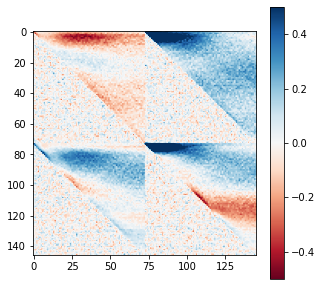

In [44]:
# plt.subplot(1,1,1) 
plt.figure(figsize=(5,5))
plt.imshow(rf2m_w, vmin=-.5, vmax=.5, cmap=plt.cm.RdBu)
plt.colorbar()

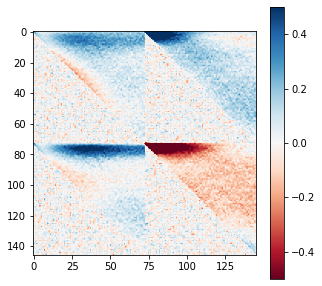

In [37]:
# plt.subplot(1,1,1) 
plt.figure(figsize=(5,5))
plt.imshow(rf2m_w, vmin=-.5, vmax=.5, cmap=plt.cm.RdBu)
plt.colorbar()

In [55]:
rf2m_w

array([[ 0.5160362 ,  0.1411472 ,  0.0620154 , ...,  0.1325646 ,
         0.22264183,  0.17599864],
       [-0.03009784,  0.32721978,  0.1648107 , ...,  0.09502596,
         0.08635854,  0.10945941],
       [-0.05789316,  0.09881134,  0.23505576, ...,  0.17516474,
         0.16088772,  0.08042285],
       ...,
       [ 0.12848678,  0.0097679 ,  0.08966334, ...,  0.03787424,
        -0.02586857, -0.03770707],
       [ 0.09368433,  0.03537952,  0.09609465, ...,  0.01117421,
         0.02898167,  0.0223234 ],
       [ 0.02181605, -0.0531355 , -0.10083932, ..., -0.11655907,
        -0.03496003, -0.08118806]], dtype=float32)

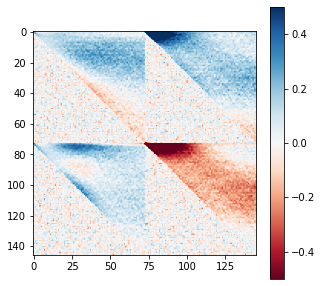

In [56]:
# plt.subplot(1,1,1) 
plt.figure(figsize=(5,5))
plt.imshow(rf2m_w, vmin=-.5, vmax=.5, cmap=plt.cm.RdBu)
plt.colorbar()

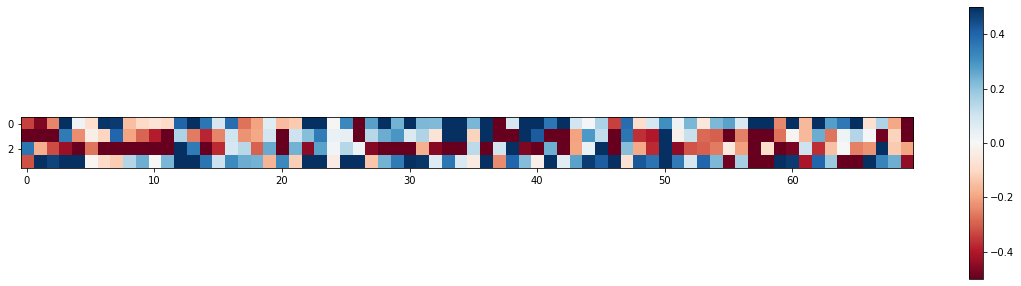

In [57]:
# plt.subplot(1,1,1) 
plt.figure(figsize=(20,5))
plt.imshow(f2lr_W, vmin=-.5, vmax=.5, cmap=plt.cm.RdBu)
plt.colorbar()

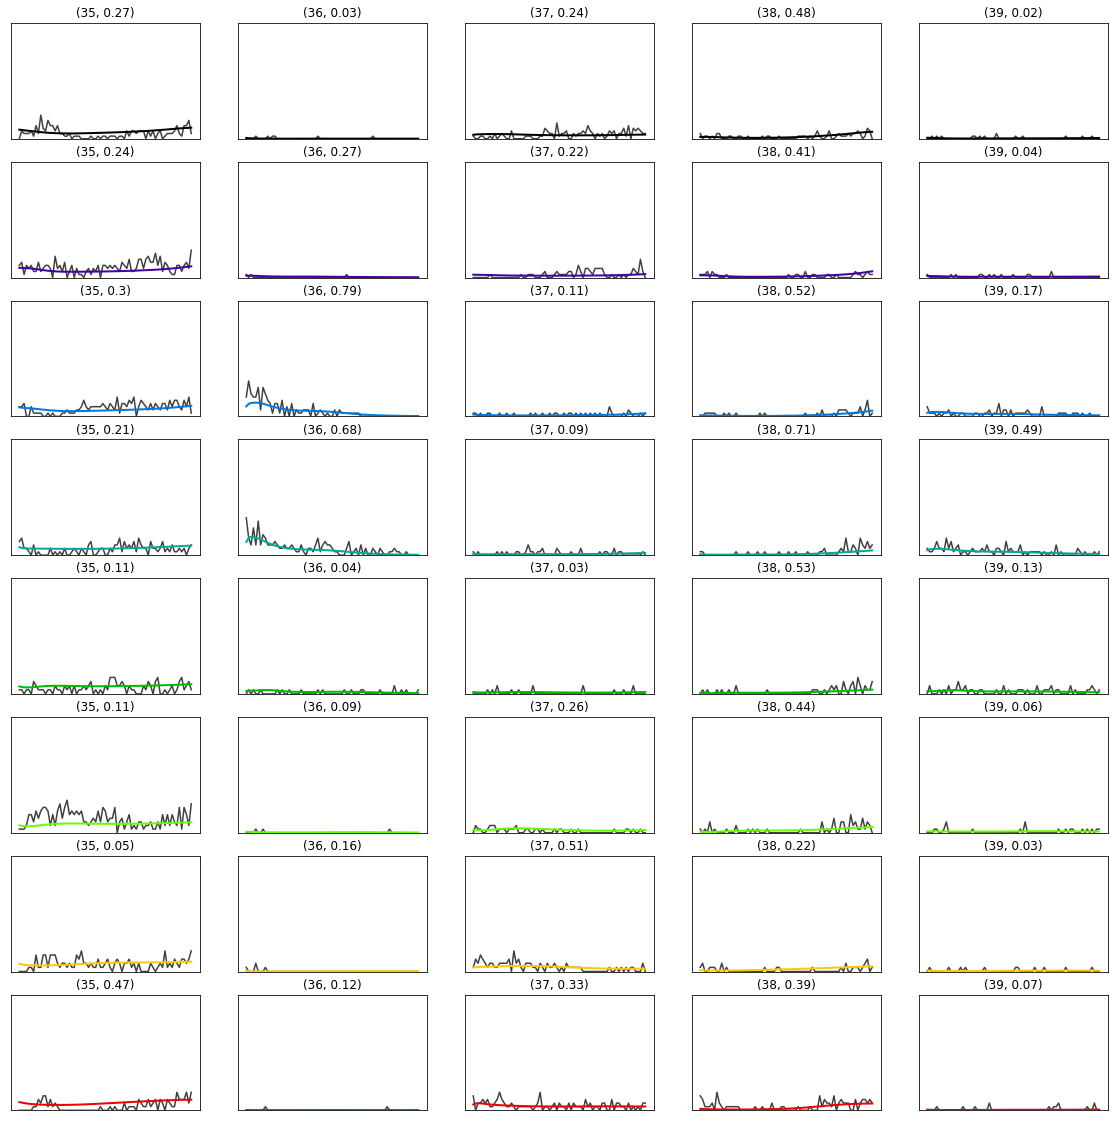

In [82]:
# trial avg rates and single predictions
fig = plt.figure(figsize=(40,20))
for i in range(8):
    data = ground_truth_train_spikes[np.array(direction_index_train)==i,:,:]
    #     data = ground_truth_test_spikes[np.array(direction_index)==i,:,:]
    for i_n,n in enumerate(range(35,40)):
        ax = fig.add_subplot(8, 10, i*10+i_n+1)
        pred = posterior_train_rates[np.array(direction_index_train)==i,:,n]
        x = np.arange(data.shape[1])
    #     ax.fill_between(x,np.mean(data,axis=0)[:,n]-np.std(data,axis=0)[:,n], np.mean(data,axis=0)[:,n]+np.std(data,axis=0)[:,n]);
        ax.plot(x,np.mean(data,axis=0)[:,n],'k',alpha=0.75);
    #     ax.plot(pred.T,lw=2, color=colors[i]);
        ax.plot(x,np.mean(pred,axis=0),lw=2, color=colors[i]);
        ax.set_xticks(())
        ax.set_yticks(())
        rs = np.corrcoef(np.mean(pred,axis=0), np.mean(data,axis=0)[:,n])[0,1]
        rs = get_r_squared(pred.T, 
                  np.tile(np.mean(data,axis=0)[:,n],(data.shape[0],1)).T)[1]
        ax.set_title((n, np.round(rs,2)))
        plt.ylim(0,2)

In [59]:

# class Poisson(object):
#     """Poisson distributon

#     Computes the log probability under the model.

#     """

#     def __init__(self, log_rates):
#         """ Create Poisson distributions with log_rates parameters.

#         Args:
#           log_rates: a tensor-like list of log rates underlying the Poisson dist.
#         """
#         self.logr = log_rates

#     def logp(self, bin_counts):
#         """Compute the log probability for the counts in the bin, under the model.

#         Args:
#           bin_counts: array-like integer counts

#         Returns:
#           The log-probability under the Poisson models for each element of
#           bin_counts.
#         """
#         k = tf.to_float(bin_counts)
#         # log poisson(k, r) = log(r^k * e^(-r) / k!) = k log(r) - r - log k!
#         # log poisson(k, r=exp(x)) = k * x - exp(x) - lgamma(k + 1)
#         return k * self.logr - tf.exp(self.logr) - tf.lgamma(k + 1)

In [60]:
from distributions import Poisson

In [85]:
posterior_test_rates[:,:40,:].shape

(17, 40, 70)

In [86]:
from distributions import Poisson
sess = tf.Session()
rates_tensor = tf.convert_to_tensor(posterior_test_rates[:,:40,:], dtype='float32')
spikes_tensor = tf.convert_to_tensor(ground_truth_test_spikes[:,:40,:])
likelihood = Poisson(tf.log(rates_tensor)).logp(spikes_tensor)
likelihood_total = - tf.reduce_mean(tf.reduce_sum(tf.reduce_sum(likelihood[0], [1])))
lt, ll = sess.run([likelihood_total, likelihood])
print(lt, '+-', np.std(np.sum(np.sum(ll,1),1)))

1086.897 +- 54.590523


In [98]:
from distributions import Poisson
sess = tf.Session()
rates_tensor = tf.convert_to_tensor(posterior_test_rates[:,40:,:], dtype='float32')
spikes_tensor = tf.convert_to_tensor(ground_truth_test_spikes[:,40:,:])
likelihood = Poisson(tf.log(rates_tensor)).logp(spikes_tensor)
likelihood_total = - tf.reduce_mean(tf.reduce_sum(tf.reduce_sum(likelihood[0], [1])))
lt, ll = sess.run([likelihood_total, likelihood])
print(lt, '+-', np.std(np.sum(np.sum(ll,1),1)))

795.7488 +- 44.943405


In [96]:
np.sum(np.sum(ll,1),1)

array([-1086.6172 , -1008.50085, -1038.236  , -1041.3606 , -1067.7272 ,
       -1111.5248 ,  -926.5075 , -1024.9966 ,  -989.0359 ,  -980.468  ,
       -1040.293  , -1005.6429 , -1011.3362 ,  -950.12744,  -902.2161 ,
       -1011.89264, -1073.6621 ], dtype=float32)

In [97]:
from distributions import Poisson
sess = tf.Session()
rates_tensor = tf.convert_to_tensor(lfads_posterior_test_rates[:,40:,:], dtype='float32')
spikes_tensor = tf.convert_to_tensor(ground_truth_test_spikes[:,40:,:])
likelihood = Poisson(tf.log(rates_tensor)).logp(spikes_tensor)
likelihood_total = - tf.reduce_mean(tf.reduce_sum(tf.reduce_sum(likelihood[0], [1])))
lt_lfads, ll_lfads = sess.run([likelihood_total, likelihood])
print(lt_lfads, '+-', np.std(np.sum(np.sum(ll_lfads,1),1)))

792.94196 +- 44.31104


In [95]:
np.sum(np.sum(ll_lfads,1),1)

array([-1087.9318 , -1010.8418 , -1036.5256 , -1045.701  , -1068.1464 ,
       -1113.9556 ,  -926.8169 , -1026.048  ,  -994.68036,  -982.5119 ,
       -1034.6757 , -1000.7097 , -1020.59406,  -951.8121 ,  -908.49884,
       -1012.3266 , -1077.511  ], dtype=float32)

Text(0, 0.5, 'TNDM')

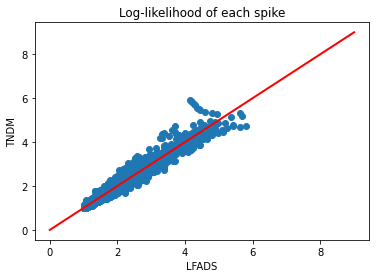

In [66]:
plt.scatter(-ll_lfads[np.where(ground_truth_test_spikes==1)], -ll[np.where(ground_truth_test_spikes==1)])
plt.plot(range(10), range(10), lw=2, color='red')
plt.title("Log-likelihood of each spike")
plt.xlabel("LFADS")
plt.ylabel("TNDM")

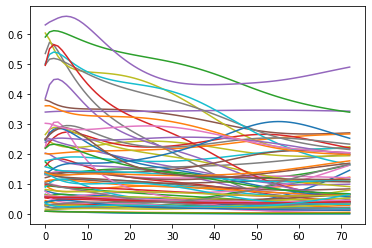

In [69]:
plt.plot((lfads_posterior_test_rates[0]));

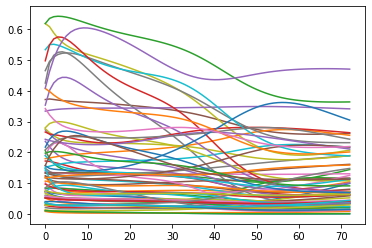

In [67]:
plt.plot((posterior_test_rates[0]));

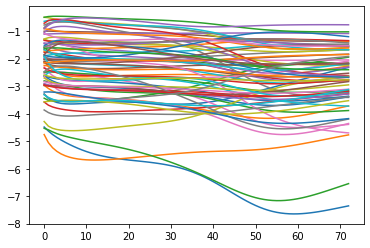

In [68]:
plt.plot(np.log(posterior_test_rates[0]));

In [31]:
np.sum(np.log(posterior_test_rates[0]) > 0)

0

In [32]:
ln(xy)=ln(x)+ln(y)

SyntaxError: cannot assign to function call (<ipython-input-32-b523de0250ee>, line 1)

In [ ]:
ln(xy)=ln(x)+ln(y)

In [ ]:
z_rel --> ln(x_z_rel) 

In [ ]:
z_irel --> ln(x_z_irel)

In [ ]:
# import tensorflow_probability as tfp
# x = tf.random.normal(shape=(10, 64))
# y = tf.random.normal(shape=(10, 64))

# # cov[i, j] is the sample covariance between x[:, i, j] and y[:, i, j].
# cov = tfp.stats.covariance(x, y, sample_axis=0, event_axis=None)
# m_x = tf.reduce_mean(x,axis=0)
# m_y = tf.reduce_mean(y,axis=0)

# cov = (1/10)*tf.matmul(tf.transpose(x-m_x), (y-m_y))


# # cov_matrix[i, m, n] is the sample covariance of x[:, i, m] and y[:, i, n]
# cov_matrix = tfp.stats.covariance(x, y, sample_axis=0, event_axis=-1)
# squared_cov_matrix = cov_matrix**2
# mean_squared_cov = tf.reduce_mean(squared_cov_matrix)
# cm, sq_cov, mean_sq_cov = sess.run([cov_matrix, squared_cov_matrix, mean_squared_cov])